<div align='center'><div align='center'>
    
## Image Processing

### Linear Image Transforms

#### Version 0.9, 11th Feb, 2022
</div>

Begin this session by reviewing the Practical on image display and colourmaps; this will be useful to interpret
the results of transform spaces. Also ensure that you have completed the practical of Chapter 2 (the peas on
desk one), which is needed for part of this practical.

#### Complex number representations in `numpy`
We have not previously mentioned this, but `numpy` supports complex number representations and arithmetic. So, we can do things like:

In [3]:
import numpy as np
a = 1+2j # My first complex number (actually, it is!)
b = 1-2j
print(a*b) # Verify that you agree with the answer...

(5+0j)


We also have:

In [4]:

np.abs(a) #  Check....
# And the phase angle we get like this:
np.angle(a/pi)

1.1071487177940904

We also have access to the components of the complex numbers as attributes:

In [13]:
print(a.real)
print(a.imag)

1.0
2.0


### 3.1 Image Transforms & Basis Images

#### 3.1.1 On-paper preliminaries

You need to start by reading the Section of the main lecture notes related to basis images, and carefully go though the exercise involving the transformation
of the $2\times 2$ image $\mathbf{F}$ into the transform domain $\mathbf{V}$. 

The tiny image is:

$$
{\bf F}= \left (
\begin{array}{cc}
1 & 2 \\ 3 & 4
\end{array}
\right )
$$

Use the following 4 basis images:

$$
{\bf B}_{0,0}=\frac{1}{2} \left (
\begin{array}{cc} 1 & 1 \\ 1 & 1 \end{array} \right )
$$,

$$
{\bf B}_{0,1}=\frac{1}{2}\left (
\begin{array}{cc} 1 & -1 \\ 1 & -1 \end{array} \right )
$$

$$
{\bf B}_{1,0}=\frac{1}{2} \left (
\begin{array}{cc} 1 & 1 \\ -1 & -1 \end{array} \right )
$$

$$
{\bf B}_{1,1}=\frac{1}{2}\left (
\begin{array}{cc} 1 & -1 \\ -1 & 1 \end{array} \right )
$$


Ensure, also, that you understand the operation of the matrix inner product and how it relates to these exercises in Chapter 3.

The steps below will help you do this....

<div style="background:#EEEEFF;color:black">
    
**Exercise 3.1**

1. On _paper_ (not in _Python_) make sure that you can go from the image domain into the transform domain using:

$$
v(k,l) = \langle \mathbf{F},\mathbf{B}_{k,l} \rangle,\,\,\, \textrm{for} \,\, k=0,1 \,\, \textrm{and}\,\, l = 0,1
$$

Remember (or realise/recognise) that the elements of $\mathbf{V}$ are the entries $v(k,l)$; you should recognise this implicit equivalence.

<div style="background:#EEEEFF;color:black">
    
**Exercise 3.2** 
On _paper_ (not in _Python_) make sure that you can go from the transform domain into the image domain using:

$$
f(m,n) = \langle \mathbf{V},\mathbf{B}_{m,n} \rangle,\,\,\, \textrm{for} \,\, m=0,1 \,\, \textrm{and}\,\, n = 0,1.
$$
    
<div>

<div style="background:#EEEEFF;color:black">
    
**Exercise 3.3** 

On _paper_, verify that if you do the following, you can _also_ get from transform domain back to image domain doing this:
$$
\mathbf{F} = \sum_{k}\sum_l v(k,l) \mathbf{B}_{k,l} \,\,\,\textrm{Eq (A)}
$$

<div class="alert alert-info">
 
The approach of Ex 3.2 and Ex 3.3 yield the same results; the equivalence follows from the properties of the basis images $\mathbf{B}_{k,l}$, but the two different ways of getting from transform domain back to image domain have slightly different intuitions. In the case of Ex. 2, you are projecting the transform onto basis images, whilst in Ex. 3, you are blending the basis images together with different weights to reconstruct $\mathbf{F}$, which holds the values of $f(m,n)$.

If you are of a suspicious nature, you may want to verify that the calculations also work for different choices of image $\mathbf{F}$.

</div>

#### 3.1.2 Estimating computational effort
Work out the number of additions and multiplications needed to go from the image to the transform domain. Then, assuming that your image size increases so that $\mathbf{F}$ is a $3 \times 3$ image, and there are 9 basis images (rather than 4), work out the number of operations.

In general, how does the number of operations increase as the size of the image increases (remember, the number of basis functions also increases, not just their size!)

Note: you should find that if the image is square (to simply the number of calculations), that the number of operations increases _approximately_ as the 4th power of the number of rows or columns.

### 3.2 The 2D DFT 
#### 3.2.1 Getting started
For this exercise, you will be using the `head.128` image previously used in Practical 1 (on colourmaps). Load
this image into the Notebook again, and ensure that you can display it with a grey-scale colour map. If you can't remember how to do this, you may go back to the original notebook or its PDF version.

<class 'numpy.ndarray'>
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


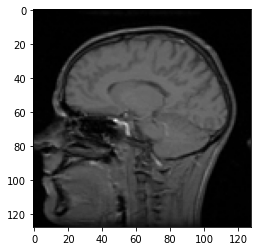

In [6]:
import numpy as np
from matplotlib import pyplot as plt
with open('IMGS/head.128', 'rb') as binary_file:
# `binary_file` is now an object with methods for reading....
# Read the whole file at once
# Note that you may not find many examples of this
# online, as reading pure binary files is seen as rare
# by many who work with pre-prepared images
    data = binary_file.read()
    

data = np.frombuffer(data, dtype=np.uint8)
# The next line tells us how to organise it
x = np.reshape(data,(128,128))
print(type(x))
plt.imshow(x, cmap='gray')
print(np.iscomplex(x))

Using the two-dimensional discrete Fourier transform, which is a member method of the module `fft()` of the `numpy` library, transform head image, which we shall refer to as variable $\mathbf{x}$, into the two-dimensional discrete Fourier domain. You will have to convert the image to a floating point representation to do this. Write down your observations about the size of the 2D DFT representation as a _Python_ `numpy` variable.

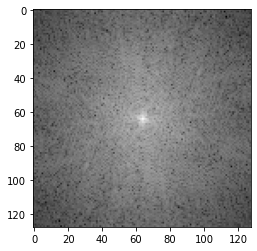

In [8]:
X = np.fft.fft2((x))

# this is just a trick, not really can show anything
plt.imshow(np.log10(abs(np.fft.fftshift(X))), cmap='gray')

In [9]:
X[0,0]

(701110+0j)

In [10]:
np.sum(x)

701110

You need to do a bit of investigation into the values of $\mathbf{X}$; you will see that they are complex valued (generally speaking), so that there is a real and imaginary part to each entry.

#### 3.2.2 Visualising Discrete Fourier Space

Generally speaking, there is no obvious way to map complex numbers to a colourmap; there are some mappings that can be applied based on the absolute and phase (angular) values, but these are not necessarily intuitive, or particularly helpful.

So, there are two general paths we can take: one is to display the real and imaginary values separately; for the case of images mapped to the 2D Fourier space, these are not usually very informative.  The _conventional_ way to display discrete Fourier space is through displaying the magnitude and phase images separately. But because only a small proportion of transform space actually has meaningful magnitudes, displaying phase on its own is not very useful. But to do this, we have to get an idea of the range of values we are looking at.

##### Dynamic range of Discrete Fourier Space Values 
Have a look at the minimum and maximum values of the complex array, $\mathbf{X}$. You can do this with:
`X.min()`
and
`X.max()`

<div class="alert alert-warning">

Be careful here: one reasonable option for `max()` and `min()` to work is to take max and min via absolute values for complex numbers; in the exercises below, we will be sorting by absolute value, but then playing around with the complex values!

</div>

Next, explore range of _absolute_ values in $\mathbf{X}$; you can do this by first finding the absolute values of all entries in $\mathbf{X}$. Check the min and max of these absolute values. From this, compute the dynamic range (in decibels, a "traditional" measure of engineering), according to:
$20 \times \log_{10}\left (\frac{|X|_{max}}{|X|_{min}}\right )$

You can also compute dyanmic range in bits (which is somewhat more used these days) as:
$\log_{2} \left (\frac{|X|_{max}}{|X|_{min}}\right )$

Compare the value you get from this calculation to the dynamic range of possible _grey-scale_ values that can be represented by your monitor. To do this, it helps to know (!) that the maximum possible distinct intensities on **each** of the red, green and blue channels of your display is (likely) restricted to 256, which includes the value of 0.

Display the _absolute_ values of the 2D DFT result. Can you see where the significant coefficients are? 

_Note_: This may be difficult if you are using a Collab notebook, because I do not believe that an external image viewer is available. 

However if you are running this notebook on your own PC or Mac, you should be able to use an external viewer with the 
`%matplotlib` directive; the external viewer should have an indicator of the value at each pixel as you move the mouse cursor around.

Remember that after using this directive, you need to use:
`%matplotlib inline` to return to default display of images _inside_ the notebook itself.

In [11]:
import matplotlib.pyplot as plt
from matplotlib import colors

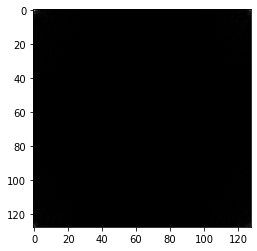

In [12]:
# Use external image viewer for this
%matplotlib inline
plt.imshow(np.abs(X), cmap='gray', norm=) # Allow normalisation to be used!

**A more sensible arrangement of Discrete Fourier Space**

Explore the effect of the `np.fft.fftshift()` command. This is largely a cosmetic function which re-arranges discrete Fourier space so that the low frequencies - which are usually dominant - are at the centre of the image array: it simplifies the interpretation of the image structure somewhat. 

After applying `fftshift()`, the frequency of basis image corresponding to $(k=0,l=0)$ is at the _centre_ of discrete Fourier space, and the frequencies of components increase as we move away from the centre.

Positive and negative frequencies are actually pretty similar, but display different shift  relationships (i.e. phase) between the sin and cosine components: this is the only interpretation that you need to put on the somewhat awkward term "negative frequency"!

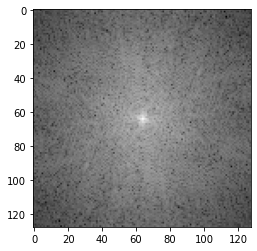

In [14]:
plt.imshow(np.fft.fftshift(np.abs(X)), cmap='gray')

#### 3.3 The Inverse DFT

To explore the inverse discrete Fourier transform is easy: just apply it to the _unmodified, complex_ discrete Fourier space result; the command is `np.fft.ifft2()`. 

_Hint_: Interpreting the output is not quite as straightfoward as it sounds. You will have to investigate the values in `xdash` carefully to figure out what is going on. Remember that you can extract real and imaginary components from a complex variable (or complex `numpy` array)!

<div style="background:#EEEEFF;color:black">

**Exercise**
Apply the Inverse Discrete Fourier Transform to transform representation $\mathbf{X}$, and assign the result to the variable `xdash`.  How similar is the data held in `xdash` to the original `head` image, held in variable `x`? What do you need to do to display `xdash` as an image?

</div>
    

In [15]:
xdash = np.fft.ifft2(X)

In [17]:
np.shape(xdash)

(128, 128)

In [19]:
xdash[0,0]

(7.216449660063518e-15-5.277028813921447e-15j)

In [20]:
x[0,0]

0

In [21]:
devition = xdash - x
np.max(np.abs(devition))


3.3348586872405996e-14

#### Displaying the reconstructed image

You will have seen that the reconstructed image (that is, the inverse 2D DFT of the 2D DFT of an original grey-scale image) is very close to the original. But there is still a bit of a catch: you will also see that the result is complex valued. 

However, looking at the imaginary values, you will see that they are of quite small magnitude:

In [22]:
# You must have computed xdash first; in case you have not, I load
# it below.
if 'xdash' not in globals().keys():
    xdash=np.load('IMGS/xdash.npy')
print('Imag max:', np.max(np.abs(xdash.imag)))
print('Real max:', np.max(np.abs(xdash.real)))

Imag max: 2.989969383193625e-14
Real max: 224.0


This means that you can safely ignore the imaginary component (you may wish to double check my reasoning on this), and do the following:

`plt.imshow(xdash.real, cmap='gray')`

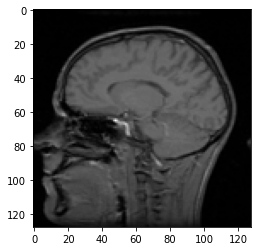

In [23]:
plt.imshow(xdash.real, cmap='gray')

### 3.4 Quantifying the Difference Between Images

So, if you got as far as computing the deviation image in Section 3.3, you may wonder how we would go about measuring how close the reconstructed image (i.e. `xdash`), which is the Inverse Discrete Fourier Transform of the Discrete Fourier Transform of `x`, is to the original image.

One way we can do this is to look at the sum of the square of the deviations; but this will get bigger as image size grows: it is better to do this in a sort of per pixel way.

For this, we can use the _Mean Square Error_ or MSE, which in this case is an average of the squared error, where the average is taken over the pixels of the image (and not, say, an experimental space).


In [44]:
# You must have xdash obtained to run the next lines
MSE = np.mean((xdash - x)**2)
print(MSE) # Ridiculously small

(8.045324171931396e-30+9.587525447761307e-31j)


Another measure is the _Root Mean Square Error_ or RMSE, which we get as the square root of MSE. This does not add much, but may make the numbers a bit more interpretable.

In [45]:
RMSE = np.sqrt(MSE)
print(RMSE) # Still ridiculously small

(2.84144098158043e-15+1.687088612769401e-16j)


However, we can use these to investigate the effect of keeping only parts of Fourier space: this is a way of appreciating the energy compaction property of this particular transform space.

First, however, we will do some experiments to visualise the basis images, to make sure we know what is going on...

### 3.5 Visualising basis images

Look at Eqn.(A) from **Section 3.1.1** of this notebook.  It explains how to go from transform space into image space. The equation provides a nifty bit of insight into how to extract the basis images.

The only dependency that the basis images of Discrete Fourier transform (and many other transforms) have on the image is through the size of the image, which is linked (as we have seen) to the number of basis images, typically equal to the number of pixels in the image.

So, the basis images _exist_ for a particular linear transform without the data. Indeed, a transform space can be constructed with no data! To be blunt: we can just make an array and call that the transform space!

In particular, if we make an empty transform space, and set only one value in it to be 1, with everything else being zero (i.e. select one value of $k$ and one value of $l$, and set the coefficient corresponding to that value to be 1, with all other coefficients being 0).  Then, apply Eqn. (A) to map the transform space to image space. What happens (look **closely** at Eqn (A))) is that you get the basis image corresponding to that particular transform coefficient. Make sure you see why this is!

We'll now do this with a little transform space (16x16) so you get the idea. It's dead easy:

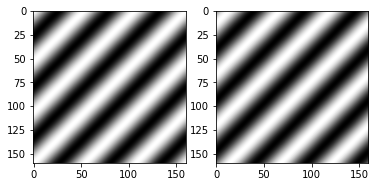

In [33]:
%matplotlib inline
V = np.zeros((160,160),dtype=complex)
V[3,3] = 1.0 # Should be a low frequency
BasisImage = np.fft.ifft2(V)
plt.subplot(1,2,1)
plt.imshow(BasisImage.real, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(BasisImage.imag, cmap='gray')

<div style="background:#EEEEFF;color:black">
    
**Exercise 3.4** What is the effect of keeping the magnitude of the non-zero element in transform space 1, but altering the phase?  This exercise should help you understand what the meaning of spatial phase is in terms of the basis images. But the other important thing to note is that discrete Fourier space is an example of what is called an _overcomplete_ representation: there is redundancy built into the transform. &#9724;

<div>

### 3.6 Energy Compaction Property

We will now look at the effect of gradually copying the coefficients from the 2D-DFT of the head image into an empty transform space array. The copying process will be done by starting from the biggest coefficient and running to the smaller ones. So, you should put aside your basis images now, and go back to the head image, and it’s associated discrete Fourier
space.

#### 3.6.1 Sorting array values
First, explore the use of the `np.sort()` command. Then, explore the `np.argsort()` command. Essentially, you now want to make sure you understand how to do the following (seemingly pointless) goal:

   _Use `np.argsort()`, together with the array you are sorting, in order to   
   return the same result as `np.sort()`._

**The reason for this will become clear as you proceed to Ex. 3.5**

Here are some hints: start by applying both `np.sort()` and `np.argsort()` to a small array of size, say, 3x3. Once you understand how use `np.argsort` to replicate the result of sort, you are ready to proceed.

I suggest something like this as a _dummy_ array to get this figured (literally _sorted_ -- sorry :-() out:

```python

myarray = np.asarray([[9, 7, 5],
                     [2, 3, 6],
                     [8, 1, 4]])

```

The next piece of the jigsaw you will need is to figure how to reverse the order of a sort. If you have an array, `arr`, you can reverse its order by indexing syntax: `arr[::-1]`

A final element of a hint: you can reshape arrays from `N` dimensions into 1 dimension using `myarr.flatten()`; and you can reshape it in the order and size you wish using `np.ravel()`, or `np.reshape()`.

Once you have this little puzzle figured out,  you are equipped for **Section 3.6.2**.

If you can't understand what is going on, I suggest speaking with a GTA.

In [36]:
myarray = np.asarray([[9, 7, 5],
                     [2, 3, 6],
                     [8, 1, 4]])
np.sort(myarray)
np.argsort(myarray)


array([[2, 1, 0],
       [0, 1, 2],
       [1, 2, 0]])

#### 3.6.2 Taking subsets of DFT Space

In the final part of this practical, we are going to see the effect of retaining only a portion of the coefficients in discrete Fourier space, and assuming the rest to be neglibible (i.e. 0).


<div style="background:#EEEEFF;color:black">
    
**Exercise 3.5**
    
Sort the complex coefficients of the 2D-DFT into decreasing order of _magnitude_. You will need to pay careful attention to the syntax and use of the argsort sort command.

Copy the _complex_ coefficients of top 100 _magnitude_ 2D-DFT space of the head image into an (initially) empty matrix, which is denoted `Ydash`, representing a new 2D-DFT space. Apply the inverse 2D-DFT to `Ydash` to generate
an approximation `ydash` to the original image `x`. What do you see? 

You will need to be sorting coefficients according to magnitude, but then copy the correct _complex_ values into the new matrix, so be careful: you are determining sorting order from one array, but using that ordering to find entries into another.

Add the next top 100 components in order of magnitude into the `Ydash`, and repeat. Create an animation in which the head image is gradually refined according to the top magnitude coefficients.

_Useful tip_:
You can clear a previously displayed image with the help of a little utility:

`from IPython.display import clear_output`

then using 

`clear_output(wait=True)` 

after 

`plt.imshow(ydash)`
`plt.show()`

should work, provided you are doing this in the Jupyter notebook itself (so, make sure you are not displaying the image in a separate window).
  
For each group of 100 coefficients, compute the error in reconstruction between the recovered image `ydash` and the original image, `x`. How does the error change with iteration (i.e every 100 coefficients in order to decreasing magnitudes)? Plot a graph of this measure of image reconstruction quality.
</div>

In [40]:
X = np.fft.fft2(x)
Xabs = np.abs(X)
ind = np.argsort(Xabs, axis=None)
reverseind = ind[::-1]
print(type(reverseind))

<class 'numpy.ndarray'>


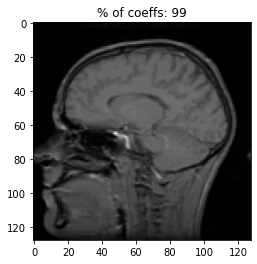

In [38]:
%matplotlib inline
from IPython.display import clear_output

# fft first?
X = np.fft.fft2(x)
Xabs = np.abs(X)
ind = np.argsort(Xabs, axis=None)
reverseind = ind[::-1]
print(reverseind)

M,N = np.shape(X)
Ydash = np.zeros((M,N),dtype=complex)

NCoefficients = len(reverseind)

# Create some empty list to hold
# results as we iterate
rmse_L = []
percent_coeffs_L = []

for i in range(1,NCoefficients,100):
    YdashUnravelled = Ydash.flatten()
    YdashUnravelled[reverseind[0:i]]=X.flatten()[reverseind[0:i]]
    Ydash=np.reshape(YdashUnravelled,(M,N))
    ydash=np.fft.ifft2(Ydash).real
    
    percent_coeffs=round(100*float(i)/(M*N))
    thisRMSE = np.sqrt(np.mean((ydash - x)**2))
    rmse_L.append(thisRMSE)
    percent_coeffs_L.append(percent_coeffs)
    
    plt.imshow(ydash.real, cmap='gray')
    textstr = '% of coeffs: '+str(percent_coeffs) 
    plt.title(textstr)
    plt.show()
    clear_output(wait=True)
    

### 3.7 Concluding Remarks

There are a few key take-aways from this practical:

1. You have some basic familarity with using one of the most successful numerical algorithms in science: the discrete Fourier Transform. Based on the Fourier Transform, it is optimised to map a time or spatial sequence into the Discrete Fourier Domain, which is very widely used in science and engineering. This algorithm is also the pillar of image reconstruction for magnetic resonance imaging.

2. We have looked at how one can "extract" the basis images from a transform given a software library that performs the _inverse_ transform. It's easy: just create an empty transform space of all zeros, and set one value at a time to 1, and compute the inverse transform: what pops out is the associated basis image for that transform, for that coefficient. Repeating this across each coefficient in turn gives the corresponding basis image. A useful hack, but also quite inciteful about the mapping between image and transform space (through Eq A). 

3. You have had a glimpse into the energy compaction properties of the discrete Fourier transform, and had an introduction to comparing two images using a reconstruction error (ah, so there was a point to that exercise!). We will be returning to this error when we consider autoencoders in Chapter 8, and also will look at it again in image registration (Ch 6).

<div class="alert alert-warning">

Although the 2D DFT does indeed have an energy compaction property, it is **not** practically used for image compression. Instead, a close ''relative'' is, known as the Discrete Cosine Transform. This is _almost_ just the real part of the DFT result, with a few other adjustments to give the transform better numerical properties. The key challenge with using the standard 2D DFT for compression is that it is _overcomplete_: it *expands* on the number of values in the original array, because it uses complex basis functions which -- due to their definition -- are _highly_ redundant. 
    
The redundancy of the 2D DFT provides some benefit, which is arises from the use of the magnitude of the transform to obtain a shift-invariant description of an image. This can be used in certain settings to detect the presence of particular patterns in image space. This will be discussed briefly in the lectures.
</div>

### 4.0 Learning Outcomes

1. (Minor) A reminder about complex numbers, and your first use of them through `numpy`.

2. (Major) A reminder of how to go from image domain into transform domain given basis images (remember that some mappings might use what are called the dual basis to move from image space into transform space; in this example, the dual and basis images are the same). This involves taking sums pf products of pixel and basis images, one per value in transform space. This is numerically and mathemtically correct, though it may be computationally sub-optimal. It is useful to remember because of the intuition it gives to any general linear transform.

3. (Major) A reminder that for this transform (where dual and basis images are the same), we can go from transform space back into image space by performing the same operations in reverse.

4. (Major) We have another way of looking at the mapping, which is throught the weighted sum of basis images. This is very similar in spirit to the usual definition and explanation of Fourier series. Now, basis images are the ingredients that we add together, rather than ONLY talking about sine and cosine waves.

5. (Major) Use of the classic 2D DFT algorithm, applied to a scalar-valued (intensity) image maps the image array to a complex-valued array that represents the Fourier domain.

6. (Minor) Use of ``fftshift()`` to unwrap Fourier space, placing low values of frequency in the centre. Reminder that the dynamic range of values in discrete Fourier space is large; this is a consequence of energy compaction.

7. (Major) The idea of evaluating reconstruction error after mapping into Fourier space, preserving only a fraction of coefficients, and coming out again with that fraction. This introduces us to a way to measure the energy compaction of a transform that is intended as an alternative representation, linear or not!  We will meet this again in Chapter 8.